In [3]:
import numpy as np
import pandas as pd

from mpl_toolkits.basemap import Basemap
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12,7)
%matplotlib inline

In [5]:
df = pd.read_csv('IMOS_-_Larval_Fish_Sub-Facility_-_Database_of_Marine_Larval_Fish_Assemblages_in_Australian_temperate_and_subtropical_waters_(1983_-_ongoing).csv')
#_-_Larval_Fish_Sub-Facility_-_Database_of_Marine_Larval_Fish_Assemblages_in_Australian_temperate_and_subtropical_waters_(1983_-_ongoing)')
df.head()

/tmp/ipykernel_57/4156763192.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('IMOS_-_Larval_Fish_Sub-Facility_-_Database_of_Marine_Larval_Fish_Assemblages_in_Australian_temperate_and_subtropical_waters_(1983_-_ongoing).csv')


,Project,StationName,Latitude,Longitude,TripCode,SampleTime_UTC,SampleTime_Local,Year_Local,Month_Local,Day_Local,...,Trichiuridae_Lepidopus.caudatus_37440002,Trichiuridae_other_37440000,Trichonotidae_Trichonotus.spp_37394901,Triglidae_Lepidotrigla.papilio_37288002,Triglidae_Lepidotrigla.spp_37288901,Triglidae_other_37288000,Tripterygiidae_37415000,Uranoscopidae_37400000,Xiphiidae_Xiphias.gladius_37442001,Zeidae_37264906
0,NIMO_Franklin_94,Bondi-C,-33.9500,151.4433,FR 02/94,1994-01-24T15:09:00Z,25/1/1994 1:09,1994,1,25,...,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0
1,NIMO_Franklin_94,Bondi-C,-33.9500,151.4433,FR 02/94,1994-01-24T14:59:00Z,25/1/1994 0:59,1994,1,25,...,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0
2,NIMO_Franklin_94,Bondi-C,-33.9500,151.4433,FR 02/94,1994-01-24T14:49:00Z,25/1/1994 0:49,1994,1,25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NIMO_Franklin_94,Bondi-B6,-33.9583,151.3333,FR 02/94,1994-01-25T12:04:00Z,25/1/1994 22:04,1994,1,25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NIMO_Franklin_94,Bondi-B5,-33.9583,151.3333,FR 02/94,1994-01-25T11:50:00Z,25/1/1994 21:50,1994,1,25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df['Bathymetry_m']

0       130.0
1       130.0
2       130.0
3        83.0
4        83.0
        ...  
2389    100.0
2390    100.0
2391    100.0
2392    100.0
2393    100.0
Name: Bathymetry_m, Length: 2394, dtype: float64

<AxesSubplot:xlabel='StationName'>

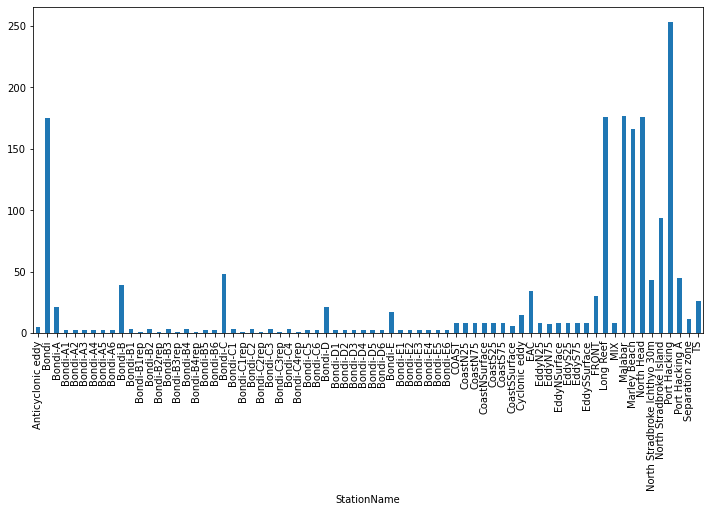

In [7]:
#df.groupby('StationName').Chaetodontidae_37365900.count().nlargest(20).plot(kind='bar', figsize=(12,6))
df.groupby('StationName').Chaetodontidae_37365900.count().plot(kind='bar', figsize=(12,6))

In [8]:
#mystat=df.groupby('StationName').Chaetodontidae_37365900.count().nlargest(20)
mystat=df.groupby('StationName').Chaetodontidae_37365900.count()
mystat

StationName
Anticyclonic eddy            5
Bondi                      175
Bondi-A                     21
Bondi-A1                     2
Bondi-A2                     2
                          ... 
North Stradbroke Island     94
Port Hacking               253
Port Hacking A              45
Separation zone             11
TS                          26
Name: Chaetodontidae_37365900, Length: 72, dtype: int64

In [9]:
grpstat = df.groupby('StationName')

In [10]:
def extractStationInfo(stationName):
    lat = grpstat.get_group(stationName).Latitude.values[0]
    lon = grpstat.get_group(stationName).Longitude.values[0]
    depth = grpstat.get_group(stationName).Bathymetry_m.values[0]
    
    return [stationName,lat,lon,depth]

In [11]:
stationData = []
for k in range(len(mystat)):
    stationName = mystat.index[k]
    stationData.append(extractStationInfo(stationName))


In [12]:
stationData

[['Anticyclonic eddy', -35.3625, 150.8502, nan],
 ['Bondi', -33.9, 151.417, 60.0],
 ['Bondi-A', -33.945, 151.2917, 67.0],
 ['Bondi-A1', -33.945, 151.2917, 67.0],
 ['Bondi-A2', -33.945, 151.2917, 67.0],
 ['Bondi-A3', -33.945, 151.2917, 67.0],
 ['Bondi-A4', -33.945, 151.2917, 67.0],
 ['Bondi-A5', -33.945, 151.2917, 67.0],
 ['Bondi-A6', -33.945, 151.2917, 67.0],
 ['Bondi-B', -33.9583, 151.3333, 83.0],
 ['Bondi-B1', -33.9583, 151.3333, 83.0],
 ['Bondi-B1rep', -33.9583, 151.3333, 83.0],
 ['Bondi-B2', -33.9583, 151.3333, 83.0],
 ['Bondi-B2rep', -33.9583, 151.3333, 83.0],
 ['Bondi-B3', -33.9583, 151.3333, 83.0],
 ['Bondi-B3rep', -33.9583, 151.3333, 83.0],
 ['Bondi-B4', -33.9583, 151.3333, 83.0],
 ['Bondi-B4rep', -33.9583, 151.3333, 83.0],
 ['Bondi-B5', -33.9583, 151.3333, 83.0],
 ['Bondi-B6', -33.9583, 151.3333, 83.0],
 ['Bondi-C', -33.95, 151.4433, 130.0],
 ['Bondi-C1', -33.95, 151.4433, 130.0],
 ['Bondi-C1rep', -33.95, 151.4433, 130.0],
 ['Bondi-C2', -33.95, 151.4433, 130.0],
 ['Bondi-C2rep

In [13]:
mystation = stationData
mystation

[['Anticyclonic eddy', -35.3625, 150.8502, nan],
 ['Bondi', -33.9, 151.417, 60.0],
 ['Bondi-A', -33.945, 151.2917, 67.0],
 ['Bondi-A1', -33.945, 151.2917, 67.0],
 ['Bondi-A2', -33.945, 151.2917, 67.0],
 ['Bondi-A3', -33.945, 151.2917, 67.0],
 ['Bondi-A4', -33.945, 151.2917, 67.0],
 ['Bondi-A5', -33.945, 151.2917, 67.0],
 ['Bondi-A6', -33.945, 151.2917, 67.0],
 ['Bondi-B', -33.9583, 151.3333, 83.0],
 ['Bondi-B1', -33.9583, 151.3333, 83.0],
 ['Bondi-B1rep', -33.9583, 151.3333, 83.0],
 ['Bondi-B2', -33.9583, 151.3333, 83.0],
 ['Bondi-B2rep', -33.9583, 151.3333, 83.0],
 ['Bondi-B3', -33.9583, 151.3333, 83.0],
 ['Bondi-B3rep', -33.9583, 151.3333, 83.0],
 ['Bondi-B4', -33.9583, 151.3333, 83.0],
 ['Bondi-B4rep', -33.9583, 151.3333, 83.0],
 ['Bondi-B5', -33.9583, 151.3333, 83.0],
 ['Bondi-B6', -33.9583, 151.3333, 83.0],
 ['Bondi-C', -33.95, 151.4433, 130.0],
 ['Bondi-C1', -33.95, 151.4433, 130.0],
 ['Bondi-C1rep', -33.95, 151.4433, 130.0],
 ['Bondi-C2', -33.95, 151.4433, 130.0],
 ['Bondi-C2rep

In [14]:
mystation.plot(kind='line')

AttributeError: 'list' object has no attribute 'plot'

In [15]:
mystat.index,len(mystat)

(Index(['Anticyclonic eddy', 'Bondi', 'Bondi-A', 'Bondi-A1', 'Bondi-A2',
        'Bondi-A3', 'Bondi-A4', 'Bondi-A5', 'Bondi-A6', 'Bondi-B', 'Bondi-B1',
        'Bondi-B1rep', 'Bondi-B2', 'Bondi-B2rep', 'Bondi-B3', 'Bondi-B3rep',
        'Bondi-B4', 'Bondi-B4rep', 'Bondi-B5', 'Bondi-B6', 'Bondi-C',
        'Bondi-C1', 'Bondi-C1rep', 'Bondi-C2', 'Bondi-C2rep', 'Bondi-C3',
        'Bondi-C3rep', 'Bondi-C4', 'Bondi-C4rep', 'Bondi-C5', 'Bondi-C6',
        'Bondi-D', 'Bondi-D1', 'Bondi-D2', 'Bondi-D3', 'Bondi-D4', 'Bondi-D5',
        'Bondi-D6', 'Bondi-E', 'Bondi-E1', 'Bondi-E2', 'Bondi-E3', 'Bondi-E4',
        'Bondi-E5', 'Bondi-E6', 'COAST', 'CoastN25', 'CoastN75',
        'CoastNSurface', 'CoastS25', 'CoastS75', 'CoastSSurface',
        'Cyclonic eddy', 'EAC', 'EddyN25', 'EddyN75', 'EddyNSurface', 'EddyS25',
        'EddyS75', 'EddySSurface', 'FRONT', 'Long Reef', 'MIX', 'Malabar',
        'Marley Beach', 'North Head', 'North Stradbroke Ichthyo 30m',
        'North Stradbroke Island', 'Po

In [16]:
mystation[0]

['Anticyclonic eddy', -35.3625, 150.8502, nan]

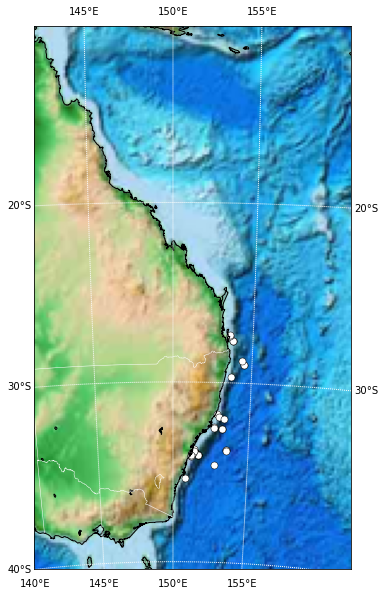

In [17]:
plt.figure(figsize=(12,10))
m = Basemap(llcrnrlon=140, llcrnrlat=-40, urcrnrlon=160, urcrnrlat=-10,
             resolution='i', projection='tmerc', lat_0 = -20, lon_0 = 150)
# m.bluemarble()
# m.shadedrelief()
m.etopo(scale=0.5) #, alpha=0.5)
m.drawcoastlines(color='black')
m.drawparallels(np.arange(-40,-10,10),labels=[1,1,0,0], color='white')
m.drawmeridians(np.arange(140.0, 160.0, 5.),labels=[0,0,1,1], color='white')
m.drawcountries(color='gray')
m.drawstates(color='white')

for k in range(len(mystation)):
    x, y = m(mystation[k][2],mystation[k][1])  # transform coordinates
    plt.scatter(x, y, marker='o', color='white', s=50, edgecolors='k', lw=0.5) 
#     plt.scatter(mystation[k][2],mystation[k][1],edgecolors='white',s=500)
    
    
plt.show()

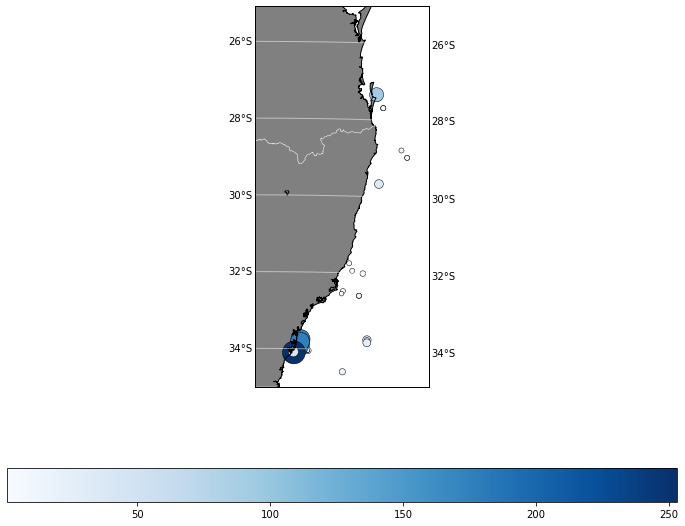

In [18]:
plt.figure(figsize=(12,10))
m = Basemap(llcrnrlon=150, llcrnrlat=-35, urcrnrlon=155, urcrnrlat=-25,
             resolution='h', projection='tmerc', lat_0 = -20, lon_0 = 150)
# m.bluemarble()
# m.shadedrelief()
# m.etopo(scale=0.8) #, alpha=0.5)
m.drawcoastlines(color='black')
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='gray',lake_color='lightblue')

m.drawparallels(np.arange(-40,-10,2),labels=[1,1,0,0], color='white')
m.drawmeridians(np.arange(150.0, 150.0, 2.),labels=[0,0,1,1], color='white')
m.drawcountries(color='gray')
m.drawstates(color='white')
#start drawing on the map#
mx = []
my = []
for k in range(len(mystation)):
    x, y = m(mystation[k][2],mystation[k][1])  # transform coordinates
    mx.append(x)
    my.append(y)
    
# mx, my = m(mystation[:][2],mystation[:][1])  # transform coordinates
    
sc = plt.scatter(mx, my, marker='o', #color='white', 
            s=mystat.values*2+10, 
            edgecolors='k', lw=0.5,
            c=mystat.values, cmap='Blues' #, vmin=100, vmax=250
           ) 
#     plt.scatter(mystation[k][2],mystation[k][1],edgecolors='white',s=500)
plt.colorbar(sc,orientation="horizontal") 
    
plt.show()

In [25]:
mystat

StationName
Port Hacking                    253
Malabar                         177
Long Reef                       176
North Head                      176
Bondi                           175
Marley Beach                    166
North Stradbroke Island          94
Bondi-C                          48
Port Hacking A                   45
North Stradbroke Ichthyo 30m     43
Bondi-B                          39
EAC                              34
FRONT                            30
TS                               26
Bondi-A                          21
Bondi-D                          21
Bondi-E                          17
Cyclonic eddy                    15
Separation zone                  11
COAST                             8
Name: Chaetodontidae_37365900, dtype: int64

In [26]:
mystation

[['Port Hacking', -34.1, 151.233, 30.0],
 ['Malabar', -33.967, 151.367, 60.0],
 ['Long Reef', -33.75, 151.433, 60.0],
 ['North Head', -33.817, 151.417, 60.0],
 ['Bondi', -33.9, 151.417, 60.0],
 ['Marley Beach', -34.133, 151.183, 60.0],
 ['North Stradbroke Island', -27.345, 153.562, 60.0],
 ['Bondi-C', -33.95, 151.4433, 130.0],
 ['Port Hacking A', -34.0833, 151.2167, 50.0],
 ['North Stradbroke Ichthyo 30m', -27.3889, 153.5802, 30.0],
 ['Bondi-B', -33.9583, 151.3333, 83.0],
 ['EAC', -29.6671, 153.7094, 214.3333],
 ['FRONT', -33.7312, 153.501, 4820.1333],
 ['TS', -33.8059, 153.5008, 4822.4667],
 ['Bondi-A', -33.945, 151.2917, 67.0],
 ['Bondi-D', -34.0, 151.5833, 250.0],
 ['Bondi-E', -34.0417, 151.6667, 600.0],
 ['Cyclonic eddy', -34.5778, 152.7629, nan],
 ['Separation zone', -32.0085, 153.3091, nan],
 ['COAST', -31.7505, 152.8851, 56.2]]